In [2]:
pip install numpy



     ---------------------------------------- 14.8/14.8 MB 3.6 MB/s eta 0:00:00


In [2]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 3.0 MB/s eta 0:00:00
     -------------------------------------- 163.6/163.6 kB 4.9 MB/s eta 0:00:00
     -------------------------------------- 965.4/965.4 kB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB ? eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


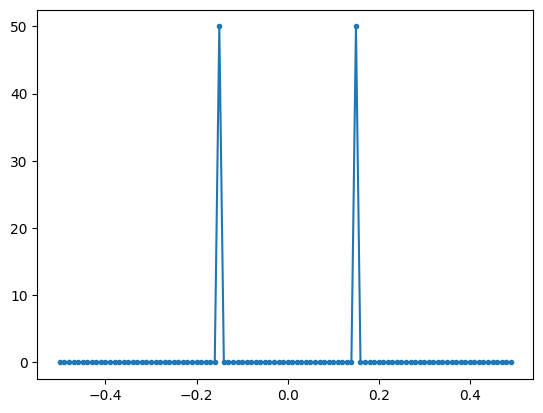

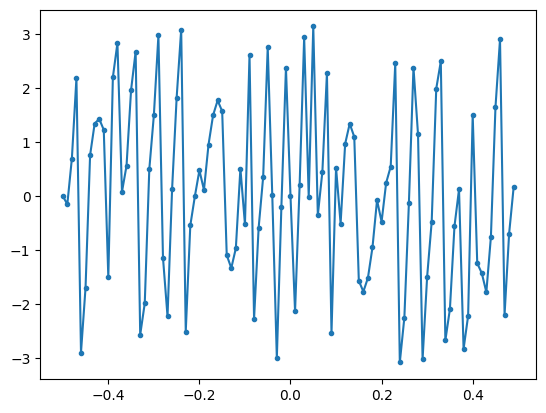

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 1 # Hz
N = 100 # number of points to simulate, and our FFT size

t = np.arange(N) # because our sample rate is 1 Hz
s = np.sin(0.15*2*np.pi*t)
S = np.fft.fftshift(np.fft.fft(s))
S_mag = np.abs(S)
S_phase = np.angle(S)
f = np.arange(Fs/-2, Fs/2, Fs/N)
plt.figure(0)
plt.plot(f, S_mag,'.-')
plt.figure(1)
plt.plot(f, S_phase,'.-')
plt.show()


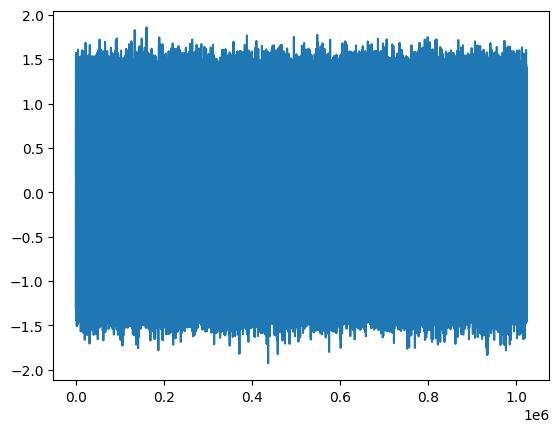

In [19]:
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 1e6

# Generate tone plus noise
t = np.arange(1024*1000)/sample_rate # time vector
f = 50e3 # freq of tone
x = np.sin(2*np.pi*f*t) + 0.2*np.random.randn(len(t))
plt.plot(x)
plt.show()

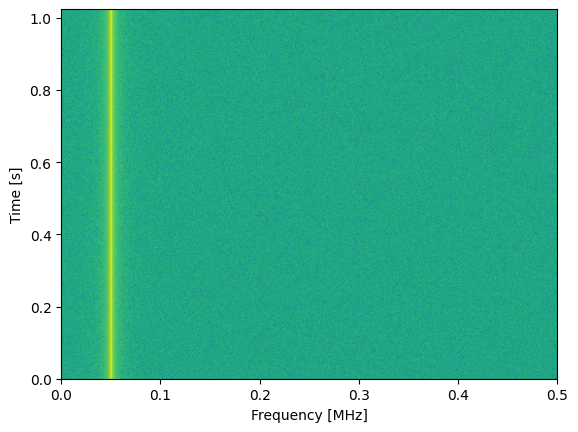

In [5]:
fft_size = 1024
num_rows = int(np.floor(len(x)/fft_size))
spectrogram = np.zeros((num_rows, fft_size))
for i in range(num_rows):
    spectrogram[i,:] = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(x[i*fft_size:(i+1)*fft_size])))**2)
spectrogram = spectrogram[:,fft_size//2:] # get rid of negative freqs because we simulated a real signal

plt.imshow(spectrogram, aspect='auto', extent = [0, sample_rate/2/1e6, 0, len(x)/sample_rate])
plt.xlabel("Frequency [MHz]")
plt.ylabel("Time [s]")
plt.show()